In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
def toss_die():
    return np.random.randint(1, 7)

In [33]:
np.random.seed(123)
[toss_die() for x in range(10)]

[6, 3, 5, 3, 2, 4, 3, 4, 2, 2]

In [34]:
# Exercise 8.01: Sampling with and without replacement
# 2.
suits = ['hearts', 'diamonds', 'spades', 'clubs']
ranks = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']

In [35]:
# 3.
cards = [rank + "-" + suit for rank in ranks for suit in suits]

In [48]:
# 4.
np.random.choice(cards, size = 5, replace = False)

array(['8-spades', '8-clubs', '4-spades', '10-hearts', '9-spades'],
      dtype='<U14')

In [51]:
# 5.
def deal_hands():
    drawn_cards = np.random.choice(cards, size = 10, replace = False)
    hand1 = drawn_cards[:5]
    hand2 = drawn_cards[5:]
    return hand1, hand2

In [62]:
deal_hands()

(array(['2-clubs', '4-clubs', '2-spades', '9-hearts', '9-spades'],
       dtype='<U14'),
 array(['6-hearts', '6-spades', '4-hearts', 'Jack-hearts', '7-diamonds'],
       dtype='<U14'))

In [63]:
# 6.
def deal_hands2():
    drawn_cards = np.random.choice(cards, size = 10, replace = True)
    hand1 = drawn_cards[:5]
    hand2 = drawn_cards[5:]
    return hand1, hand2

In [71]:
np.random.seed(2)
deal_hands2()

(array(['Jack-hearts', '4-clubs', 'Queen-diamonds', '3-hearts', '6-spades'],
       dtype='<U14'),
 array(['Jack-clubs', '5-spades', '3-clubs', 'Jack-hearts', '2-clubs'],
       dtype='<U14'))

In [72]:
# Probability as a relative frequency
np.random.seed(81)
one_million_dice_tosses = np.random.randint(low = 1, high = 7, size = int(1e6))

In [73]:
one_million_dice_tosses[:10]

array([4, 2, 1, 4, 4, 4, 2, 2, 6, 3])

In [76]:
# A: 2
# B: 6
n_of_A = (one_million_dice_tosses == 2).sum()
prob_of_A = n_of_A / one_million_dice_tosses.shape[0] 
print(n_of_A)
print(prob_of_A)

165950
0.16595


In [77]:
n_of_B = (one_million_dice_tosses == 6).sum()
prob_of_B = n_of_B / one_million_dice_tosses.shape[0] 
print(n_of_B)
print(prob_of_B)

166809
0.166809


In [87]:
n_of_odd = ((one_million_dice_tosses == 1) | (one_million_dice_tosses == 3) | (one_million_dice_tosses == 5)).sum()
prob_of_odd = n_of_odd / one_million_dice_tosses.shape[0] 
print(n_of_odd)
print(prob_of_odd)

501162
0.501162


In [90]:
n_of_comp = ((one_million_dice_tosses < 5)).sum()
prob_of_comp = n_of_comp / one_million_dice_tosses.shape[0] 
print(n_of_comp)
print(prob_of_comp)

666004
0.666004


In [92]:
# Defing random variables
np.random.seed(55)

number_of_dice_tosses = int(1e6)

die_1 = np.random.randint(low = 1, high = 7, size = number_of_dice_tosses)
die_2 = np.random.randint(low = 1, high = 7, size = number_of_dice_tosses)

X = die_1 + die_2


In [94]:
prob_of_X_10 = (X == 10).sum()/X.shape[0]
prob_of_X_10

0.083239

In [95]:
prob_of_X_gtr_5 = (X > 5).sum()/X.shape[0]
prob_of_X_gtr_5

0.721723

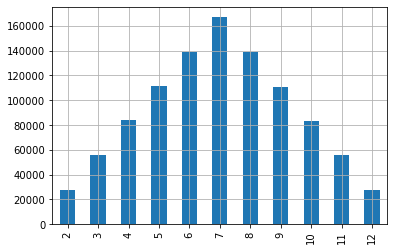

In [97]:
X_s = pd.Series(X)

freq_X = X_s.value_counts()
freq_X.sort_index().plot(kind = 'bar')
plt.grid()

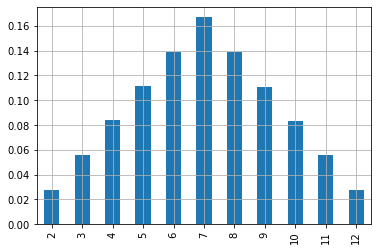

In [99]:
freq_prob_X = X_s.value_counts()/X.shape[0]
freq_prob_X.sort_index().plot(kind = 'bar')
plt.grid()

In [149]:
np.random.seed(97)
ten_coins_one_million_times = np.random.randint(low = 0, high = 2, size = int(10e6)).reshape(-1, 10)

In [101]:
Y = ten_coins_one_million_times.sum(axis = 1)

In [103]:
Prob_Y_is_zero = (Y == 0).sum()/Y.shape[0]
Prob_Y_is_zero

0.000986

In [104]:
Prob_Y_is_ten = (Y == 10).sum()/Y.shape[0]
Prob_Y_is_ten

0.000961

(11,)

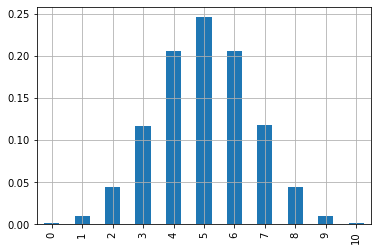

In [145]:
Y = pd.Series(Y)

freq_Y = Y.value_counts()
prob_Y = freq_Y / Y.shape[0]

prob_Y.sort_index().plot(kind = 'bar')
plt.grid()

In [107]:
prob_Y.loc[[4, 5, 6]]

4    0.205283
5    0.246114
6    0.205761
dtype: float64

In [108]:
prob_Y.loc[[4, 5, 6]].sum()

0.657158

In [109]:
# Exercise 8.02: Calculating the average wins in roulette
# 2.
def roulette(num_games = 1):
    # Generate the wheel
    roulette_nums = np.arange(0, 37)
    
    outcome = np.random.choice(a = roulette_nums, size = num_games, replace = True)
    
    return outcome

In [111]:
# 3.
def payoff(outcome, units = 1):
    payout = 0
    # bet m units on the numbers from 19:36
    # if the outcome is any oF the selected numbers then you win m units
    if outcome > 18:
        payout = units
    else:
        # you lose the m units
        payout =- units
    return payout

In [113]:
# 4.
payoff = np.vectorize(payoff)

In [121]:
# 5.
number_of_spins = int(1e6)
outcomes = roulette(number_of_spins)
payoffs = payoff(outcomes)

print((outcomes > 18).sum())
print(payoffs.sum())
print(np.mean(payoffs))

486993
-26014
-0.026014


In [124]:
# Discrete Random variables
np.random.seed(977)
np.random.choice(['defective', 'good'], size = 12, p = (0.04, 0.96))

array(['good', 'good', 'good', 'good', 'good', 'good', 'good',
       'defective', 'good', 'good', 'good', 'good'], dtype='<U9')

In [127]:
np.random.seed(10)

n_boxes = int(1e6)
parts_per_box = 12

one_million_boxes = np.random.choice([1, 0], size = (n_boxes, parts_per_box), p = (0.04, 0.96))

In [130]:
defective_pieces_per_box = one_million_boxes.sum(axis = 1)
np.mean(defective_pieces_per_box)

0.480512

In [132]:
defective_pieces_per_box = pd.Series(defective_pieces_per_box)
freq = defective_pieces_per_box.value_counts()
probs = freq / n_boxes

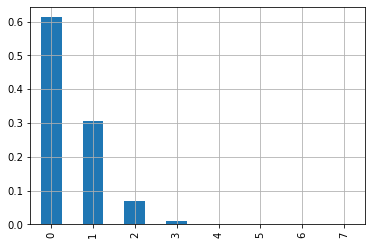

In [133]:
probs.sort_index().plot(kind = 'bar')
plt.grid()

In [134]:
# The Binomial Distribution
Y_rv = stats.binom(n = 10, p = 0.5)

In [150]:
y_vals = np.arange(0, 11)
Y_probs = Y_rv.pmf(y_vals)

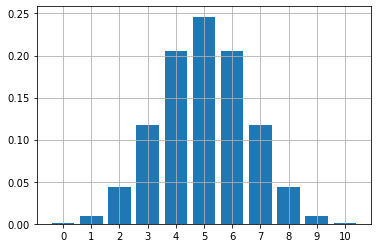

In [151]:
fig, ax = plt.subplots()
ax.bar(y_vals, Y_probs)
ax.set_xticks(y_vals)
ax.grid()

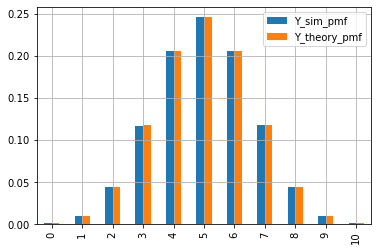

In [156]:
Y_rv_df = pd.DataFrame({'Y_sim_pmf': prob_Y, 'Y_theory_pmf': Y_probs}, index = y_vals)
Y_rv_df.plot(kind = 'bar')
plt.grid()

In [157]:
# Exercise 8.03: Checking if a random varuable follows the binomial distribution
# 5.
parts_per_box = 12

Z_rv = stats.binom(n = 12, p = 0.04)

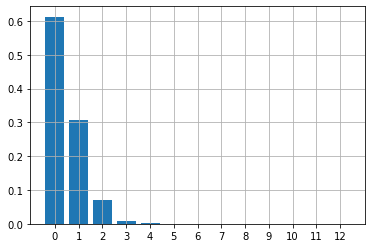

In [159]:
# 6
z_possible_vals = np.arange(0, parts_per_box + 1)

Z_probs = Z_rv.pmf(z_possible_vals)

fig, ax = plt.subplots()
ax.bar(z_possible_vals, Z_probs)
ax.set_xticks(z_possible_vals)
ax.grid()

In [162]:
# Continuous Random variables
games = pd.read_csv("../Chapter_7/appstore_games.csv")
original_cols_dict = {x: x.lower().replace(" ", "_") for x in games.columns}
games.rename(columns = original_cols_dict, inplace = True)

<AxesSubplot:>

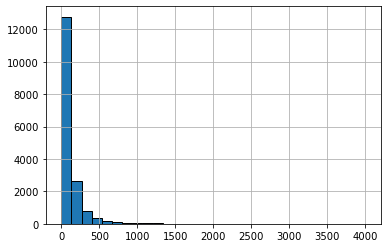

In [163]:
games['size'] = games['size'] / (1e6)
games['size'] = games['size'].fillna(games['size'].median())
games['size'].hist(bins = 30, ec = 'k')

In [164]:
# get the number of games to use as denominator
number_of_games = games['size'].size
# calculate probabilities
prob_X_gt_100 = (games['size'] > 100).sum()/number_of_games

prob_X_bt_100_and_400 = ((games['size'] >= 100) & 
                         (games['size'] <= 400)).sum()/number_of_games

prob_X_eq_152_53 = (games['size'] == 152.53).sum()/number_of_games

In [165]:
print(prob_X_gt_100)
print(prob_X_bt_100_and_400)
print(prob_X_eq_152_53)


0.33098136061621686
0.28305991650496853
0.0


In [169]:
# The Normal Distribution
mean = 170
sd = 10

heights_rv = stats.norm(loc = mean, scale = sd)
heights_rv.pdf(175)

0.03520653267642995

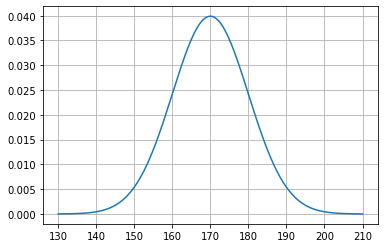

In [171]:
values = np.linspace(130, 210, num = 200)
heights_rv_pdf = heights_rv.pdf(values)

plt.plot(values, heights_rv_pdf)
plt.grid()

In [176]:
sample_heights = heights_rv.rvs(size = 5, random_state = 998)

for i, h in enumerate(sample_heights):
    print(f'Men {i + 1} height: {h:0.1f}')

Men 1 height: 171.2
Men 2 height: 173.3
Men 3 height: 157.1
Men 4 height: 164.9
Men 5 height: 179.1


In [182]:
sim_size = int(1e5)

sample_heights = heights_rv.rvs(size = sim_size, random_state = 88)
prob_event = (sample_heights > 190).sum()/sim_size

print(f' Probability of a male over 190cm is {prob_event: 0.5f} (or {100*prob_event:0.2f}%)')

 Probability of a male over 190cm is  0.02303 (or 2.30%)


In [196]:
means = [170, 170, 175]
sds = [10, 5, 10]
countries = ["A", "B", "C"]

heights_rvs = {}
plotting_values = {}


for i, country in enumerate(countries):
    heights_rvs[country] = stats.norm(loc = means[i], scale = sds[i])

for i, country in enumerate(countries):
    x_values = np.linspace(means[i] - (4 * sds[i]), means[i] + (4 * sds[i]))
    y_values = heights_rvs[country].pdf(x_values)
    plotting_values[country] = (x_values, y_values)

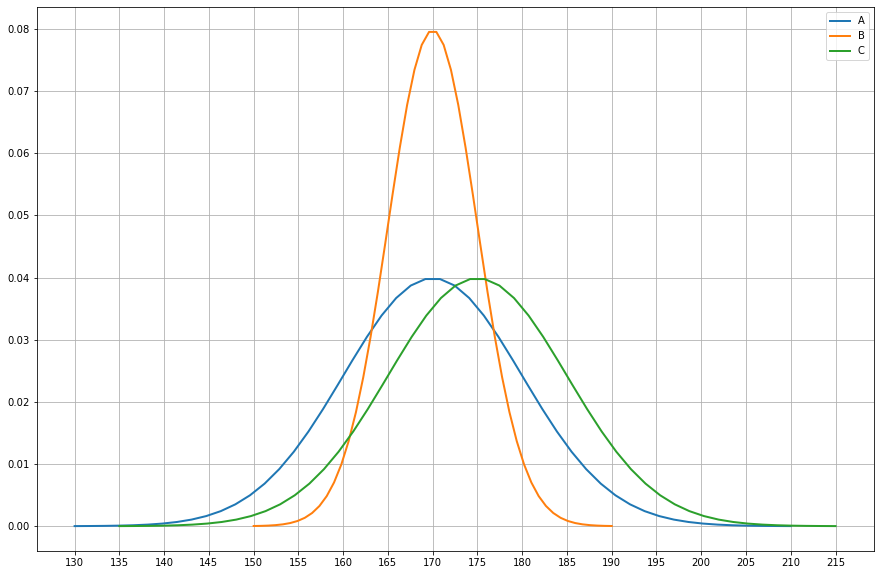

In [197]:
fig, ax = plt.subplots(figsize = (15, 10))

for i, country in enumerate(countries):
    ax.plot(plotting_values[country][0], plotting_values[country][1], label = country, lw = 2)

ax.set_xticks(np.arange(130, 220, 5))
plt.legend()
plt.grid()

In [198]:
from matplotlib.patches import Polygon

def func(x):
    return heights_rv.pdf(x)

lower_lim = 160
upper_lim = 180

x = np.linspace(130, 210)
y = func(x)

[]

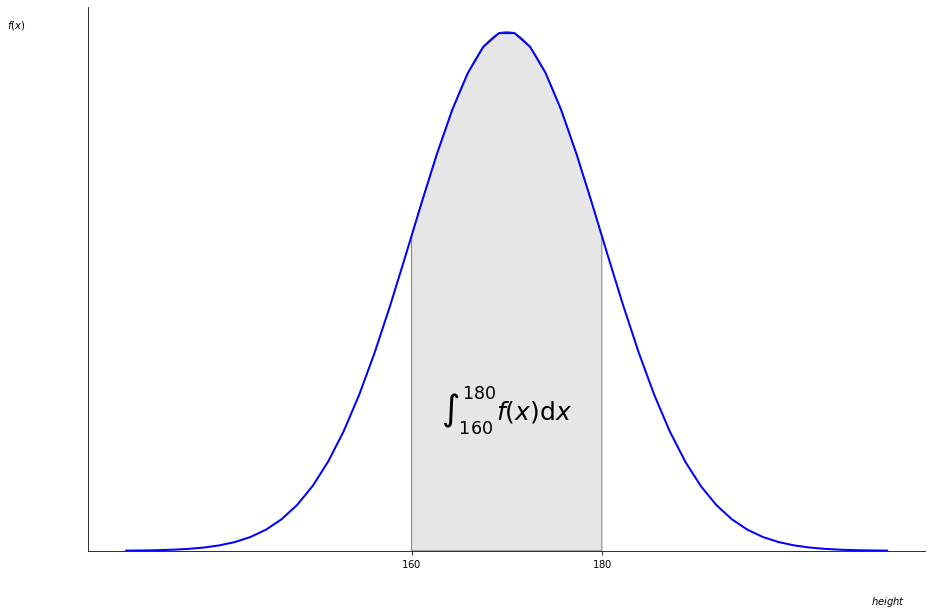

In [214]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(x, y, 'blue', linewidth = 2)
ax.set_ylim(bottom = 0)

ix = np.linspace(lower_lim, upper_lim)
iy = func(ix)

verts = [(lower_lim, 0), *zip(ix, iy), (upper_lim, 0)]
poly = Polygon(verts, facecolor = '0.9', edgecolor = '0.5')
ax.add_patch(poly)

ax.text(0.5 * (lower_lim + upper_lim), 0.01,
       r"$\int_{160}^{180} f(x)\mathrm{d}x$",
        horizontalalignment = 'center', fontsize = 25)

fig.text(0.85, 0.05, '$height$')
fig.text(0.05, 0.85, '$f(x)$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position("bottom")

ax.set_xticks((lower_lim, upper_lim))
ax.set_xticklabels(('$160$', '$180$'))
ax.set_yticks(())

In [216]:
prob_x_in_lims = heights_rv.cdf(upper_lim) - heights_rv.cdf(lower_lim)
prob_x_in_lims

0.6826894921370859

In [217]:
# Whats the probability of having a heigh > 190
prob_gt_190 = heights_rv.cdf(np.Inf) - heights_rv.cdf(190)
prob_gt_190

0.02275013194817921

In [218]:
# Exercise 8.04: Using the normal distribution in education
# 2.
X_mean = 100
X_sd = 15

X_rv = stats.norm(loc = X_mean, scale = X_sd)

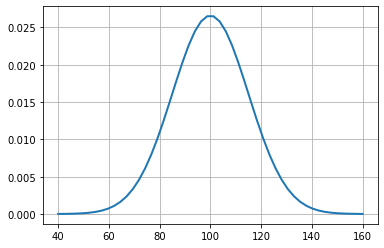

In [220]:
# 3. 
x_values = np.linspace(X_mean - (4 * X_sd), X_mean + (4 * X_sd))
y_values = X_rv.pdf(x_values)

plt.plot(x_values, y_values, lw = 2)
plt.grid()

In [222]:
# 4.
low = 80
high = np.Inf

X_rv.cdf(high) - X_rv.cdf(low)

0.9087887802741321

In [227]:
# 5.
pop_admitted = 0.02
X_rv.ppf(1-pop_admitted)

130.80623365947733

In [249]:
# Activity 8.01: Using the normal distribution in Finance
# 1.
msft = pd.read_csv("./MSFT.csv", header = 0)

In [250]:
# 2.
msft.columns = ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']

In [251]:
msft.describe()

,open,high,low,close,adj_close,volume
count,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2.310000e+03
mean,49.232779,49.653381,48.788801,49.245416,45.128864,4.137619e+07
std,25.049006,25.262955,24.785046,25.038599,26.036170,2.335172e+07
min,23.090000,23.320000,22.730000,23.010000,18.277956,7.425600e+06
25%,29.072500,29.360001,28.752500,28.972499,23.969493,2.573010e+07
50%,41.754999,42.105000,41.449999,41.789999,37.526640,3.585165e+07
75%,60.330000,60.732499,59.927499,60.327498,57.021808,5.134808e+07
max,115.419998,116.180000,114.930000,115.610001,113.435432,3.193179e+08


In [252]:
msft.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object

In [253]:
# 3.
msft['date'] = pd.to_datetime(msft['date'])

In [254]:
msft.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
dtype: object

In [255]:
# 4.
msft.set_index('date', inplace = True)

In [256]:
# 5. (453)
msft['returns'] = msft['adj_close'].pct_change()

In [257]:
# 6
start_date = '2014-01-01'
end_date = '2018-12-31'
# msft = msft.loc[np.logical_and(msft.index > start_date, msft.index < start_date)]
msft = msft.loc[start_date:end_date]

In [258]:
msft

,open,high,low,close,adj_close,volume,returns
date,,,,,,,
2014-01-02,37.349998,37.400002,37.099998,37.160000,32.471554,30632200,-0.006683
2014-01-03,37.200001,37.220001,36.599998,36.910000,32.253098,31134800,-0.006728
2014-01-06,36.849998,36.889999,36.110001,36.130001,31.571505,43603700,-0.021133
2014-01-07,36.330002,36.490002,36.209999,36.410000,31.816179,35802800,0.007750
2014-01-08,36.000000,36.139999,35.580002,35.759998,31.248198,59971700,-0.017852
...,...,...,...,...,...,...,...
2018-12-24,97.680000,97.970001,93.980003,94.129997,92.758461,43935200,-0.041739
2018-12-26,95.139999,100.690002,93.959999,100.559998,99.094772,51634800,0.068310
2018-12-27,99.300003,101.190002,96.400002,101.180000,99.705742,49498500,0.006166


<AxesSubplot:>

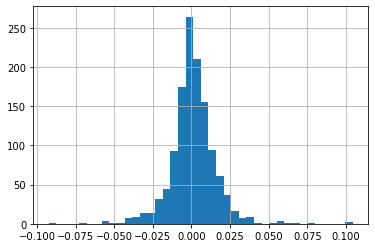

In [259]:
# 7.
msft['returns'].hist(bins = 40)

In [261]:
msft['returns'].describe()

count    1258.000000
mean        0.000996
std         0.014591
min        -0.092534
25%        -0.005956
50%         0.000651
75%         0.007830
max         0.104522
Name: returns, dtype: float64

In [263]:
# 9.
R_rv = stats.norm(loc = msft['returns'].mean(), scale = msft['returns'].std())

(array([ 0.04033943,  0.16135771,  0.72610968,  4.19530036, 29.89151504,
        13.997781  ,  1.3715405 ,  0.20169713,  0.08067885,  0.08067885]),
 array([-0.09253364, -0.07282804, -0.05312244, -0.03341684, -0.01371124,
         0.00599436,  0.02569995,  0.04540555,  0.06511115,  0.08481675,
         0.10452235]),
 <BarContainer object of 10 artists>)

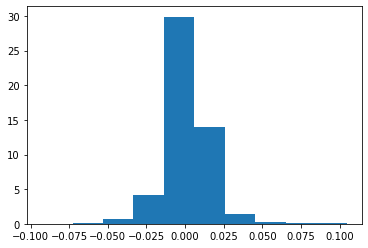

In [267]:
# 10.
x_values = msft['returns'].sort_values()
y_values = R_rv.pdf(x_values)

plt.hist(x_values, density = True)